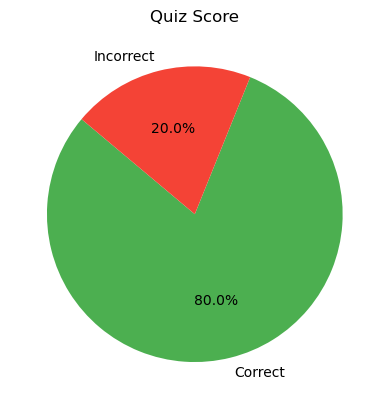

In [1]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt

# Sample quiz data: question, options, and the correct answer
quiz_data = [
    {"question": "What does CPU stand for?", "options": ["Central Processing Unit", "Central Power Unit", "Computer Personal Unit", "Control Processing Unit"], "answer": "Central Processing Unit"},
    {"question": "Which of the following is an input device?", "options": ["Monitor", "Printer", "Keyboard", "Speaker"], "answer": "Keyboard"},
    {"question": "What is the main function of the operating system?", "options": ["Manage hardware resources", "Run applications", "Provide security", "All of the above"], "answer": "All of the above"},
    {"question": "Which programming language is known as the backbone of web development?", "options": ["Java", "HTML", "C++", "Python"], "answer": "HTML"},
    {"question": "What does 'RAM' stand for?", "options": ["Random Access Memory", "Read Access Memory", "Rapid Access Memory", "Random Application Memory"], "answer": "Random Access Memory"},
    {"question": "Which company developed the Windows operating system?", "options": ["Apple", "IBM", "Microsoft", "Google"], "answer": "Microsoft"},
    {"question": "What is the smallest unit of data in a computer?", "options": ["Byte", "Bit", "Kilobyte", "Megabyte"], "answer": "Bit"},
    {"question": "Which of the following is a cloud storage service?", "options": ["Dropbox", "Google Drive", "OneDrive", "All of the above"], "answer": "All of the above"},
    {"question": "What does 'URL' stand for?", "options": ["Uniform Resource Locator", "Universal Resource Locator", "Uniform Reference Locator", "Universal Reference Locator"], "answer": "Uniform Resource Locator"},
    {"question": "Which type of malware is designed to replicate itself?", "options": ["Virus", "Trojan", "Spyware", "Adware"], "answer": "Virus"},
]

class QuizApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Quiz Challenge")
        self.root.geometry("500x400")
        self.root.configure(bg="#f0f8ff")  # Light blue background

        self.score = 0
        self.question_index = 0

        # Title Label
        self.title_label = tk.Label(root, text="Welcome to the Quiz Challenge!", font=("Helvetica", 18, "bold"), bg="#f0f8ff", fg="#4CAF50")
        self.title_label.pack(pady=10)

        # Question and option frame
        self.question_frame = tk.Frame(root, bg="#f0f8ff")
        self.question_frame.pack(pady=20)

        self.question_label = tk.Label(self.question_frame, text="", font=("Arial", 16, "bold"), wraplength=400, bg="#f0f8ff", fg="#333333")
        self.question_label.pack(pady=10)

        # Option frame for grid layout
        self.option_frame = tk.Frame(root, bg="#f0f8ff")
        self.option_frame.pack(pady=10)

        # Options as radio buttons
        self.option_var = tk.StringVar(value="")
        self.option_buttons = []
        for i in range(4):  # Assuming 4 options per question
            btn = tk.Radiobutton(self.option_frame, text="", variable=self.option_var, value="", font=("Arial", 14),
                                 bg="#f0f8ff", fg="#333333", selectcolor="#dcedc8", anchor="w")
            btn.grid(row=i, column=0, sticky='w', padx=20, pady=5)  # Use grid for alignment
            self.option_buttons.append(btn)

        # Submit button
        self.submit_button = tk.Button(root, text="Submit Answer", command=self.submit_answer,
                                       font=("Arial", 14), bg="#4CAF50", fg="white", width=15)
        self.submit_button.pack(pady=20)

        # Start the quiz
        self.show_question()

    def show_question(self):
        if self.question_index < len(quiz_data):
            question_data = quiz_data[self.question_index]
            self.question_label.config(text=question_data["question"])

            # Set options text
            for i, option in enumerate(question_data["options"]):
                self.option_buttons[i].config(text=option, value=option)
            self.option_var.set("")  # Reset selected option
        else:
            self.show_score_chart()

    def submit_answer(self):
        selected_option = self.option_var.get()
        correct_answer = quiz_data[self.question_index]["answer"]

        # Check if the selected option is correct
        if selected_option == correct_answer:
            self.score += 1

        # Move to the next question
        self.question_index += 1
        self.show_question()

    def show_score_chart(self):
        self.root.withdraw()  # Hide the main window

        # Display score in a message box
        messagebox.showinfo("Quiz Completed", f"Your Score: {self.score}/{len(quiz_data)}")

        # Plot the score chart using matplotlib
        labels = ['Correct', 'Incorrect']
        sizes = [self.score, len(quiz_data) - self.score]
        colors = ['#4CAF50', '#F44336']

        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
        plt.title("Quiz Score")
        plt.show()

        # Close the app after showing the chart
        self.root.quit()

# Run the quiz app
root = tk.Tk()
app = QuizApp(root)
root.mainloop()
